# Lecture 7. Ridge and Lasso, Categorical data 
--- 

### CS 109A/AC 209A/STAT 121A Data Science:
### Harvard University
Fall 2016 <br>
Instructors:  P. Protopapas, K. Rader, W. Pan




--- 

# Announcements 

- HW2 grades are available 
- HW3 due tonight, HW4 release later today
- Projects: Google form due tonight
- No quiz today. We messed up the reading 
- We try to be as explicit as possible about what libraries you can and should not use. But it's not possible to provide a comprehensive list of all prohibited libraries included in Anaconda install. Recall golden rule: if we say implement a function from scratch, we don't want to see:

```
import fancy_function

def my_function(input):
    return fancy_function(input)

```
    
---


In [401]:
# Quiz
import sys
import time

def countdown(n):
    #print("QUIZ TIME")
    for i in range(1*n,0,-1):
        time.sleep(1)
        sys.stdout.write(str(i)+' ')
        sys.stdout.flush()

In [402]:
#IMPORTS 
from IPython.display import Image
from ipywidgets import interact,  FloatSlider, RadioButtons
import numpy as np 
import math
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression as Lin_Reg

import itertools as it
import statsmodels.api as sm
import pandas as pd
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import Lasso as Lasso_Reg

In [537]:
# FONTS 
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

----

# Outline 
- Ridge Regression 
- Lasso 

- Categorical predictors 
- Interaction terms  
---  


----

# Outline 
- ** Ridge Regression **
- Lasso 

- Categorical predictors 
- Interaction terms  
---  


## Ridge Regression (page 215)

In ordinary least square  regression, we minimize RSS 

$$ RSS = \sum_{i=1}^{n}\left(y_i  - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2 $$


In the ridge regression, the coefficients are estimated by minimizing a slightly different quantity. In particular, the ridge regression coefficient estimates $\hat{\beta}^{R}$ are the values that minimize the following:

$$ \sum_{i=1}^{n}\left(y_i  - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2  + \lambda \sum_{j=1}^{p} \beta_k^2 = RSS + \lambda \sum_{j=1}^{p} \beta_k^2 $$

where $\lambda$ must be larger than zero and it is a tuning parameter. $\lambda$ has to be determined during the fitting procedure. 

 The tuning parameter $\lambda$ serves to control the relative impact of these two terms on the regression coefficient estimates.
 
 When $\lambda=0$, the extra term has no effect and so we go back to OLS and when $\lambda$ is very large all coefficients approach zero. 
 
 Unlike the least squares regression, here we find a set of different $\beta$'s for every value of $\lambda$. 
 
 ---
 

NOTE: The shrinkage is related to priors in a Bayesian formalism. We will come to this later in the semester 

 ---
 
 ## Intercept 
 We do not shrink $\beta_0$, which is the mean value when all predictors take zero value. Also, if we normalize the predictors to have zero mean then we get the following:
 
 $$\sum_i y_i = \sum_i{ ( \beta_0 + \sum_j \beta_j x_{ij} + \epsilon } )$$ 
 $$ \sum_i y_i = N  \beta_0 + \sum_i\epsilon$$
 $$ \frac{\sum_i y_i}{N} =  \beta_0 $$
 
---
 
 

-----
### Ridge - scaling 

Remember the solution to OLS:
$$ \hat{\beta} = {\bf (X^{T}X)^{-1} X^T Y } $$

If we multiply the predictor by a factor $\alpha$ (say change the units) $X'\leftarrow \alpha X$ 

Then the regression coefficients scale by a factor $1/c$: 

$$ \hat{\beta}' = {\bf (\alpha X^{T} \alpha X)^{-1} \alpha X^T Y } = {\bf (\alpha X^{T}  X)^{-1}  X^T Y } = \frac{\hat{\beta}}{\alpha}$$

Because the ridge regression equation has that extra term, if a predictor is multiplied by a constant (change units) the resulting regression coefficients change. 
Because of that, before we apply ridge regression we  standardize the predictors as:

$$ \tilde{x}_{ij} = \frac{x_{ij}}{ \sqrt{\frac{1}{n} \sum_i^n (x_{ij}-\bar{x}_j)^2}} $$

so all predictors are on the same scale and have standard deviation of 1. 

--- 

### Solution to ridge regression

$$\beta = (X^T\,X + \lambda I)^{-1} X^T Y $$

----

---
### Ridge - Computational complexity 

The solution of the ridge regression involves three steps. 
- Select $\lambda$ 
- Find the minimum of the ridge regression cost function (using linear algebra) as with the multiple regression and record the $R^2$ (usually on the test set) 
- Find the $\lambda$ that gives the largest $R^2$

---- 
Note: Smart techniques have been proposed how to propose a new $\lambda$ given the current $\lambda$ (not in the scope of this course)

---

### Ridge Regression - Why does it work?

First we need to formalize test error 

Test error = bias + variance + irreducible error 

Why does regularization in ridge regression reduce variance though increasing the bias?  

Imagine the scenario where we have the correct polynomial, say cubic, and we fit a cubic polynomial and consider the case we have few points.  A small variation in the training set will result in a large change of the OLS coefficients, since there are many sets of coefficients that will fit the training set well. 

However, ridge regression forces those coefficients to be smaller, thus restricting the possibility of overfitting, and therefore reduces the variance. Of course, the bias will increase. For some value of $\lambda$ we can get the best of both worlds. 


<img src = "http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png/", width=1300px>

<img src = "RidgeVarianceBias.png", width=1700px>

--- 
Simulated data. Black is the bias, green is variance, purple the test MSE

--- 

### Ridge - Example - Credit 

In this dataset there are 400 records. The  balance represents the average credit card debt for a number of individuals and  is recorded as well as several quantitative predictors: 
- age
- cards (number of credit cards)
- education (years of education)
- income (in thousands of dollars) 
- limit (credit limit)
- rating (credit rating)

In [403]:
data = pd.read_csv('Credit.csv', sep=',')
data.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [546]:
# SELECT FEW PREDICTORS 
x = data.iloc[:, 1:6].values
y = data.iloc[:, -1].values

# ii. SPLIT TRAIN AND TEST SETS
# No. of training points
n = x.shape[0]
n_train = int(np.round(n*0.25))

# First 25% train, remaining test 
# assume data has been randomly shuffled
x_train = x[:n_train,:]
y_train = y[:n_train]
x_test = x[n_train:,:]
y_test = y[n_train:]


In [605]:
# Scale the data 
x_train = x_train / x_train.std(axis=0)
x_test = x_test / x_test.std(axis=0)


In [548]:
# First, let's do plain OLS
reg = Lin_Reg()
reg.fit(x_train, y_train)

train_r_squared_plain = reg.score(x_train, y_train)
test_r_squared_plain = reg.score(x_test, y_test)

print 'Plain Regression: R^2 score on training set', train_r_squared_plain
print 'Plain Regression: R^2 score on test set', test_r_squared_plain

Plain Regression: R^2 score on training set 0.874654751148
Plain Regression: R^2 score on test set 0.864199223924


In [606]:
# Ridge regression: Fit and evaluate 
reg = Ridge_Reg(alpha = 1.0)
reg.fit(x_train, y_train)
coefficients = reg.coef_

predictors = [i for i, item in enumerate(coefficients) if abs(item) > 0]

print 'Ridge:'
print 'Coefficients:', coefficients
print  'Selected predictors:',predictors  
print 'Ridge Regression: R^2 score on training set', reg.score(x_train,y_train)
print 'Ridge Regression: R^2 score on test set', reg.score(x_test,y_test)

Ridge:
Coefficients: [ 400.97082922 -127.35123444    5.29380481]
Selected predictors: [0, 1, 2]
Ridge Regression: R^2 score on training set 0.833489641821
Ridge Regression: R^2 score on test set 0.786590247261


In [560]:
# Run for different values of lambda 
lambda_min = -4
lambda_max = 4

num_lambdas = 1000
num_predictors = x.shape[1]

lambdas= np.linspace(lambda_min,lambda_max, num_lambdas)

train_r_squared = np.zeros(num_lambdas)
test_r_squared = np.zeros(num_lambdas)

coeff_a =np.zeros((num_lambdas, num_predictors))

In [553]:
for ind, i in enumerate(lambdas):    
    # Fit ridge regression on train set
    reg = Ridge_Reg(alpha = 10**i)
    reg.fit(x_train, y_train)
       
    coeff_a[ind,:] = reg.coef_
    # Evaluate train & test performance
    train_r_squared[ind] = reg.score(x_train, y_train)
    test_r_squared[ind] = reg.score(x_test, y_test)   

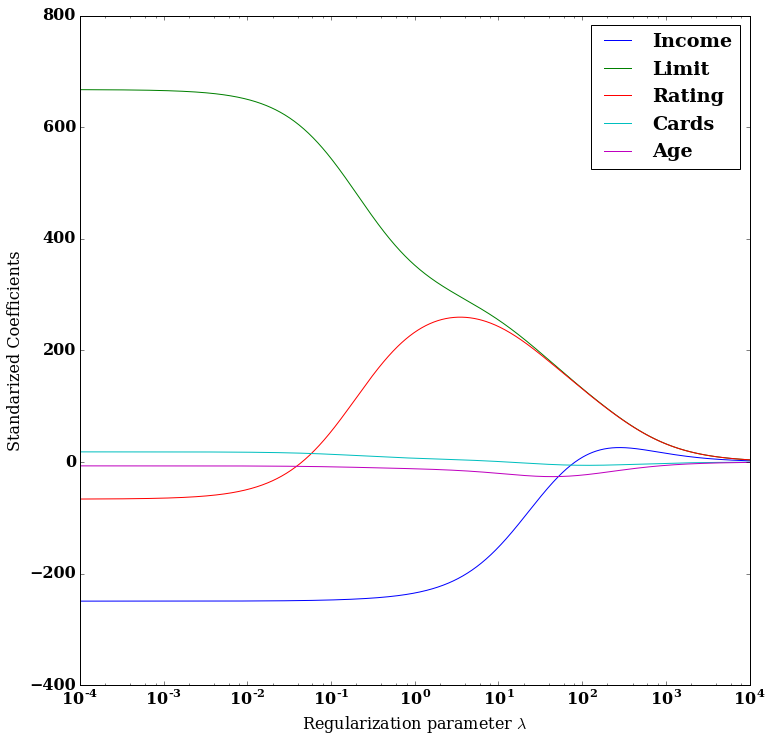

In [555]:
plt.figure(figsize=(12,12))
h=plt.semilogx(10**lambdas, coeff_a);
plt.ylabel("Standarized Coefficients")
plt.xlabel(r'Regularization parameter $\lambda$')
plt.legend(h, data.columns[1:7].values)
plt.show()

Ridge Regression: max R^2 score on training set 0.874654750514
Ridge Regression: max R^2 score on test set 0.866338037512
[-251.24141124  839.12814029 -236.00974602   24.57284534   -4.99658855]
Selected predictors: [0, 1, 2, 3, 4]


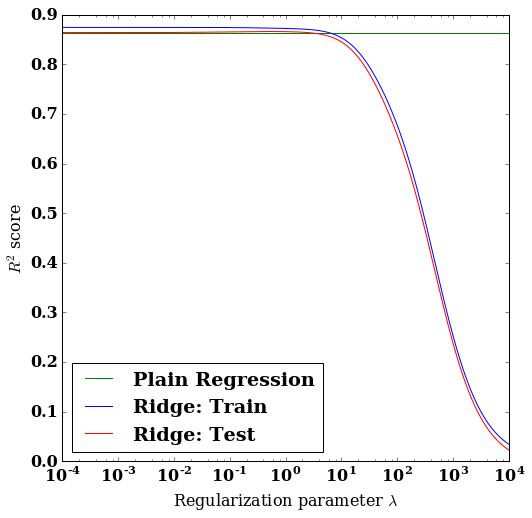

In [557]:
# Plot train an test R-squared as a function parameter value
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.axhline(y = test_r_squared_plain, c='g', label = 'Plain Regression')
ax.semilogx(10.0**lambdas, (train_r_squared), c='b', label='Ridge: Train')
ax.semilogx(10.0**lambdas, (test_r_squared), c='r', label='Ridge: Test')


ax.set_xlabel('Regularization parameter $\lambda$')
ax.set_ylabel(r'$R^2$ score')

#ax.set_ylim((test_r_squared_plain-0.2, 1.2))
ax.legend(loc = 'best')

print 'Ridge Regression: max R^2 score on training set', max(train_r_squared)
print 'Ridge Regression: max R^2 score on test set', max(test_r_squared)

reg = Lasso_Reg(alpha =lambdas[np.argmax(test_r_squared)])
reg.fit(x_train, y_train)
coefficients = reg.coef_
print coefficients
print  'Selected predictors:', [i for i, item in enumerate(coefficients) if abs(item) > 0]
plt.show()

----

# Outline 
- Ridge Regression 
- Lasso 

- ** Categorical predictors **
- Interaction terms  
---  


---

# Categorical predictors (pages 82-86)


How about the other predictors such as Gender,    Student,   Married  and  Ethnicity?


In all our examples so far, we have used only quantitative predictors. But in practice, like the example above, this is not necessarily the case; often some predictors are qualitative.


If we wish to include the gender - ignoring the other variables for the moment-  as a predictor and if this predictor only has two possible values, then we simply create an indicator or **dummy** variable that takes on two possible numerical values. For example, based on the gender variable, we can create a new variable that takes the form

$$ x_i = \left\{  \begin{array}{lll}  1 & \text{  if ith person is female} \\ 
                       0 & \text{  if ith person is male} 
                       \end{array} \right. $$

and use this variable as a predictor in the regression equation. This results in the model

$$ y_i = \beta_0 + \beta_1 x_i + \epsilon_i =   \left\{  \begin{array}{ll}   \beta_0 + \beta_1 + \epsilon_i &\text{ if ith person is female} \\ 
                         \beta_0 + \epsilon_i &  \text{  if ith person male} 
                       \end{array} \right.$$


To code females as 1 and males as 0 is arbitrary, and has no effect on the regression fit, but does alter the interpretation of the coefficients.

When a predictor has more than two levels, a single dummy variable cannot represent all possible values and so we create additional dummy variables. For example, for the ethnicity variable we create two dummy variables. The first 


$$ x_{i1} = \left\{  \begin{array}{lll}  1 & \text{  if  ith person is Asian} \\ 
                       0 & \text{  if ith person is not Asian} 
                       \end{array} \right. $$

the second 
 
$$ x_{i2} = \left\{  \begin{array}{lll}  1 & \text{  if ith person is Caucasian} \\ 
                       0 & \text{  if ith person is not Caucasian} 
                       \end{array} \right. $$
the third 

$$ x_{i3} = \left\{  \begin{array}{lll}  1 & \text{  if ith person is African American} \\ 
                       0 & \text{  if ith person is not African American} 
                       \end{array} \right. $$
                       
Both of these variables can be used in the regression equation as

$$ y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2}+ \beta_3 x_{i3} + \epsilon_i=   \left\{  \begin{array}{ll}   \beta_0 + \beta_1 + \epsilon_i &\text{ if ith person is Asian } \\ 
                         \beta_0 + \beta_2 + \epsilon_i&  \text{  if ith person is Caucasian}
                         \\ 
                         \beta_0 + \beta_3 + \epsilon_i&  \text{  if ith person is African American}
                       \end{array} \right.$$


--- 

### How do we do it?

There are two scenarios:
1. The schema of the data is given to us, so we know which columns are categorical 
2. The schema is not given to us. For this case we can:
    1. If a column type is a `string` or `object` then we encode it as above
    2. If a column type is not `string` or `object` but takes only a limited integer values, then we can assume to be categorical and decode as above

Practically, for each categorical column (predictor) we add a new column for every possible value of the predictor and the convention is to use the value of the predictor as the new column name.
Below we show how to do 2.A 

--- 

In [608]:
#
#
# i. Load data, convert to categorical attributes
data = pd.read_csv('Credit.csv')
data.head(20)

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
5,6,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151
6,7,20.996,3388,259,2,37,12,Female,No,No,African American,203
7,8,71.408,7114,512,2,87,9,Male,No,No,Asian,872
8,9,15.125,3300,266,5,66,13,Female,No,No,Caucasian,279
9,10,71.061,6819,491,3,41,19,Female,Yes,Yes,African American,1350


In [610]:
#
#
# Separate predictors and response
x_df = data.iloc[:,1:-1]
y_df = data.iloc[:,-1]

d = np.shape(x_df)[1] # no. of attributes

In [613]:
 
# Create a new data frame with first attribute

x_df_expanded = pd.DataFrame({}) # first column is numerical

In [614]:
# Iterate over all attributes
for column in x_df.columns:
    # Check if attribute is not categorical: either dtype is not object
    if(x_df[column].dtype != np.dtype('object')):
        x_df_expanded = pd.concat([x_df_expanded, x_df[column]], axis=1)
    else:
        # otherwise: use one-hot encoding
        encoding = pd.get_dummies(x_df[column])  # Convert categorical variable into dummy/indicator variables
        # append expanded attribute to data frame
        x_df_expanded = pd.concat([x_df_expanded, encoding], axis=1)
        print encoding.iloc[:1].values
x_df_expanded.head()

[[ 1.  0.]]
[[ 1.  0.]]
[[ 0.  1.]]
[[ 0.  0.  1.]]


,Income,Limit,Rating,Cards,Age,Education,Male,Female,No,Yes,No,Yes,African American,Asian,Caucasian
0,14.891,3606,283,2,34,11,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,106.025,6645,483,3,82,15,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,104.593,7075,514,4,71,11,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,148.924,9504,681,3,36,11,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,55.882,4897,357,2,68,16,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [615]:
# Convert data frame to array
x = x_df_expanded.values
y = y_df.values

# ii. SPLIT TRAIN AND TEST SETS
# No. of training points
n = x.shape[0]
n_train = int(np.round(n*0.25))

# First 25% train, remaining test
x_train = x[0:n_train,:]
y_train = y[0:n_train]
x_test = x[n_train:,:]
y_test = y[n_train:]



In [616]:
# First, let's do plain OLS
reg = Lin_Reg()
reg.fit(x_train, y_train)

train_r_squared_plain = reg.score(x_train, y_train)
test_r_squared_plain = reg.score(x_test, y_test)

print 'Plain Regression: R^2 score on training set', train_r_squared_plain
print 'Plain Regression: R^2 score on test set', test_r_squared_plain

Plain Regression: R^2 score on training set 0.962227430339
Plain Regression: R^2 score on test set 0.947415977848


In [603]:
# Run for different values of lambda 
def MyRidgeLassoReg( x_train, x_test, method, lambda_min=-4, lambda_max=4, num_lambda=1000):
   
    num_predictors = x_train.shape[1]

    lambdas= np.linspace(lambda_min,lambda_max, num_lambdas)

    train_r_squared = np.zeros(num_lambdas)
    test_r_squared = np.zeros(num_lambdas)

    coeff_a =np.zeros((num_lambdas, num_predictors))
    
    
    for ind, i in enumerate(lambdas):    
        # Fit ridge/lasso regression on train set
        if method == 'Ridge':
            reg = Ridge_Reg(alpha = 10**i)
        if method == 'Lasso':
            reg = Lasso_Reg(alpha = 10**i)
        reg.fit(x_train, y_train)


        coeff_a[ind,:] = reg.coef_
        # Evaluate train & test performance
        train_r_squared[ind] = reg.score(x_train, y_train)
        test_r_squared[ind] = reg.score(x_test, y_test)
    
    
        ind = ind + 1
    return train_r_squared, test_r_squared, coeff_a, lambdas


def PlotCoeff(lambdas, coeff_a):
    plt.figure(figsize=(12,12))
    h=plt.semilogx(10**lambdas, coeff_a);
    plt.ylabel("Standarized Coefficients")
    plt.xlabel(r'Regularization parameter $\lambda$')
    plt.legend(h, data.columns[1:7].values)
    plt.show()
    
def PlotR2( lambdas, test_r_squared_plain, train_r_squared, test_r_squared):
    # Plot train an test R-squared as a function parameter value
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))

    ax.axhline(y = test_r_squared_plain, c='g', label = 'Plain Regression')
    ax.semilogx(10.0**lambdas, (train_r_squared), c='b', label='Ridge: Train')
    ax.semilogx(10.0**lambdas, (test_r_squared), c='r', label='Ridge: Test')


    ax.set_xlabel('Regularization parameter $\lambda$')
    ax.set_ylabel(r'$R^2$ score')

    #ax.set_ylim((test_r_squared_plain-0.2, 1.2))
    ax.legend(loc = 'best')

    print 'Regression: max R^2 score on training set', max(train_r_squared)
    print 'Regression: max R^2 score on test set', max(test_r_squared)

    reg = Lasso_Reg(alpha =lambdas[np.argmax(test_r_squared)])
    reg.fit(x_train, y_train)
    coefficients = reg.coef_
    print coefficients
    print  'Selected predictors:', [i+1 for i, item in enumerate(coefficients) if abs(item) > 0]
    plt.show()

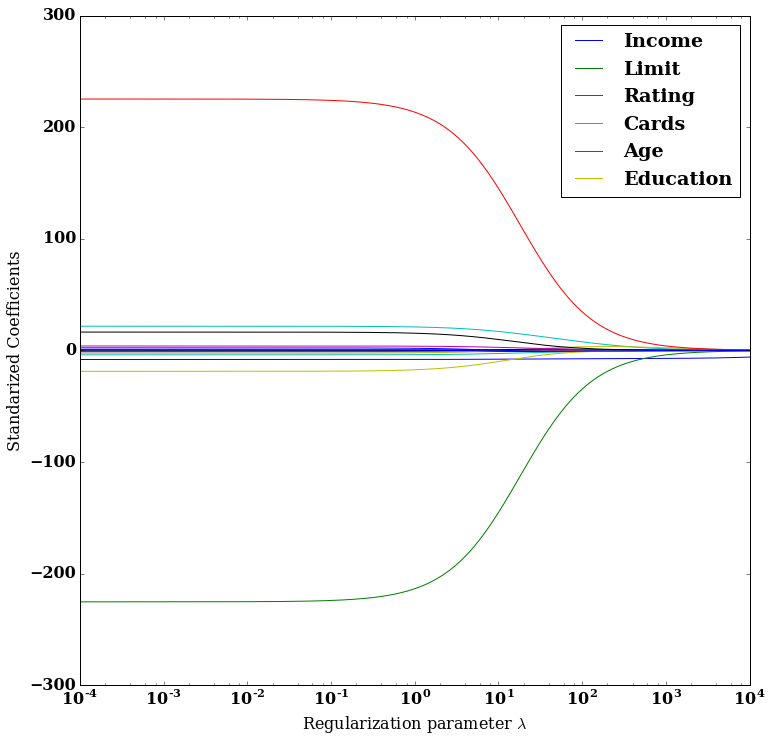

Regression: max R^2 score on training set 0.962227430337
Regression: max R^2 score on test set 0.948466558132
[ -8.13180196e+00   2.28511127e-01   7.34443307e-01   2.14204836e+01
  -1.27209437e+00  -2.48628014e+00  -0.00000000e+00   0.00000000e+00
  -4.46608142e+02   0.00000000e+00  -6.48783889e+00   2.64360671e-15
  -1.93244634e+01   1.31752222e+01  -0.00000000e+00]
Selected predictors: [1, 2, 3, 4, 5, 6, 9, 11, 12, 13, 14]


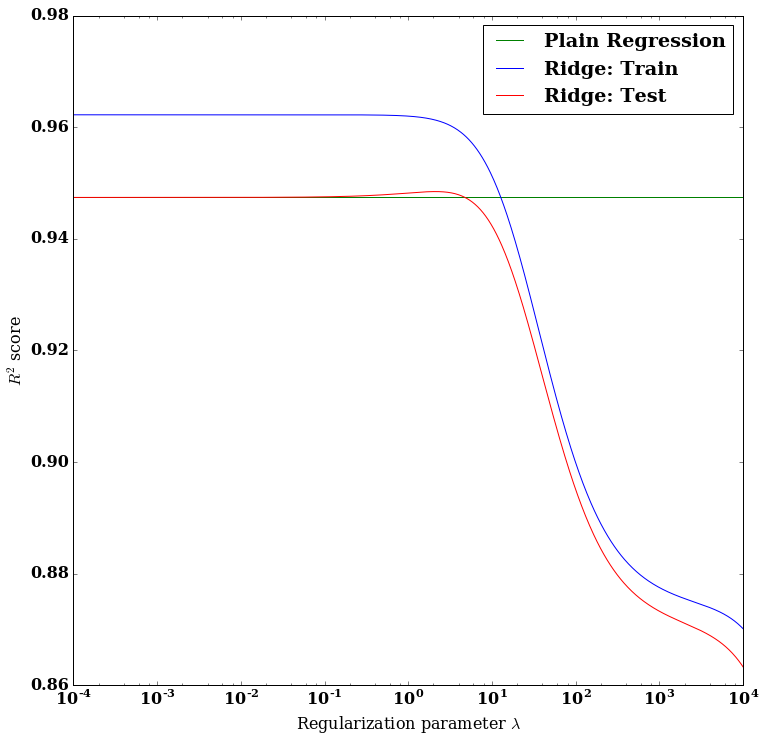

In [617]:
train_r_squared, test_r_squared, coeff_a, lambdas= MyRidgeLassoReg(x_train, x_test, 'Ridge')
PlotCoeff(lambdas, coeff_a)
PlotR2(lambdas,test_r_squared_plain, train_r_squared, test_r_squared )

----

# Outline 
- Ridge Regression 
- ** Lasso **  

- Categorical predictors
- Interaction terms  
---  


---
## The LASSO (page 219)

Ridge regression has a disadvantage. It does not select a subset of predictors unlike best subset, forward stepwise, and backward stepwise selection. It will shrink the coefficients but it will not reduce them to zero unless $\lambda \rightarrow \infty$ 

Even though it is not a problem for model accuracy, it is harder to interpret the model, especially when the number of predictors is large. 

Lasso is an alternative to ridge that overcomes this disadvantage


$$ \sum_{i=1}^{n}\left(y_i  - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2  + \lambda \sum_{j=1}^{p} |\beta_k| = RSS + \lambda \sum_{j=1}^{p} |\beta_k| $$


Ridge and lasso are very similar, both trying to constrain the coefficients with an extra term.

Note: Usually ridge is called l2 regularization  where lasso is l1 regularization.




---



# Lasso (cont)

- Lasso also shrinks the coefficient estimates towards zero. 
- The l1 penalty forces  some of the coefficients  to be **exactly** equal to zero 
- The tuning parameter λ has to be estimated as with ridge with cross-validation.
- Lasso  performs variable selection and therefore easier to interpret (sparse models) 

## Back to our example - Credit

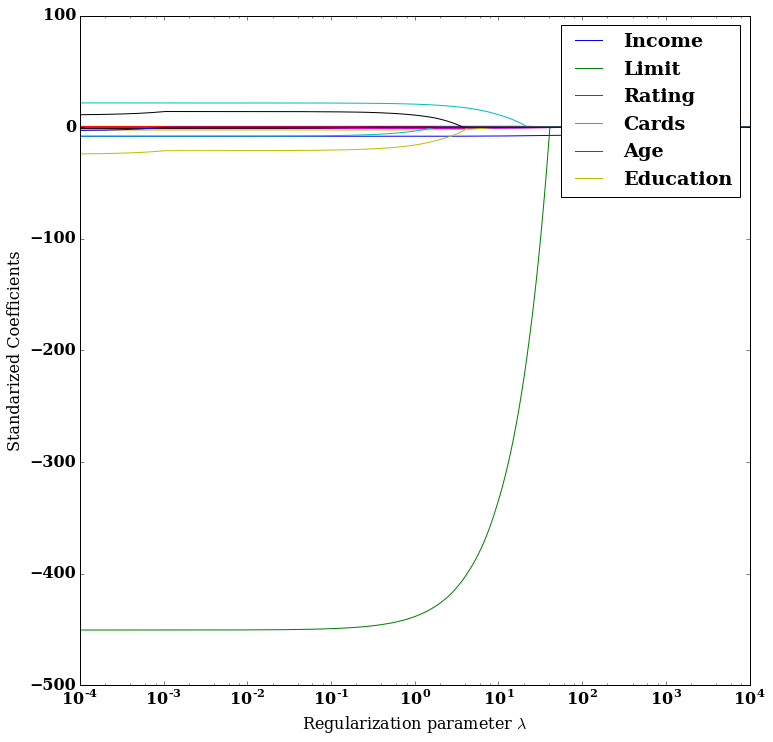

Regression: max R^2 score on training set 0.962227274041
Regression: max R^2 score on test set 0.948985243705
[ -8.12664406e+00   2.28445066e-01   7.35280060e-01   2.12207050e+01
  -1.26804902e+00  -2.45787550e+00  -0.00000000e+00   0.00000000e+00
  -4.44395827e+02   3.15135501e-12  -5.65587243e+00   0.00000000e+00
  -1.84009022e+01   1.25457536e+01  -0.00000000e+00]
Selected predictors: [1, 2, 3, 4, 5, 6, 9, 10, 11, 13, 14]


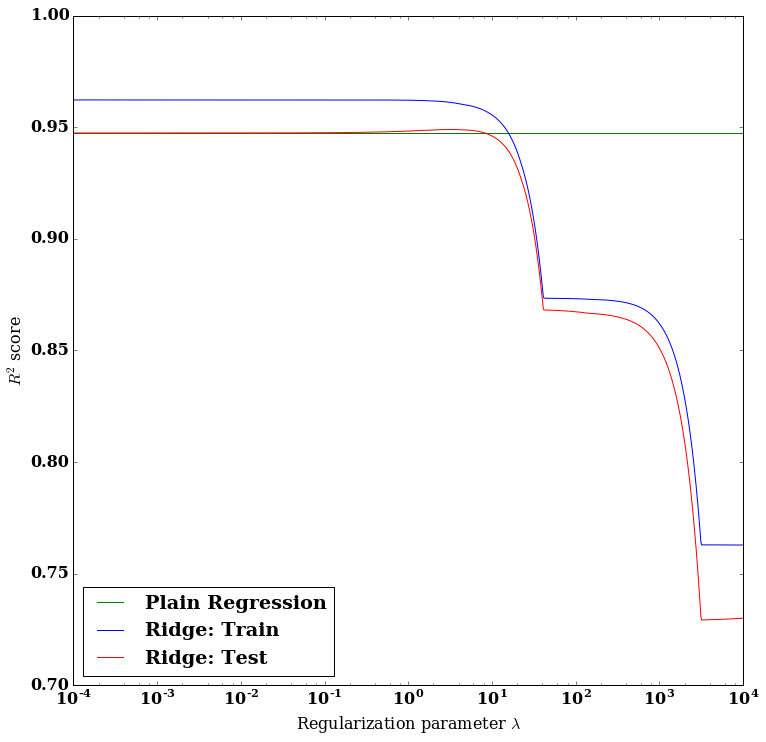

In [618]:
train_r_squared, test_r_squared, coeff_a, lambdas= MyRidgeLassoReg(x_train, x_test, 'Lasso')
PlotCoeff(lambdas, coeff_a)
PlotR2(lambdas,test_r_squared_plain, train_r_squared, test_r_squared )

--- 
# Outline 
- Ridge Regression 
- Lasso 

- Categorical predictors 
- ** Interaction terms **  
--- 

# Interaction terms (pages 87-90)

The models we have considered so far for multiple predictors look like the following:

$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \epsilon $$ 

So an increase of one unit in $X_1$ results  in $\beta_1$ units increase in $Y$ no matter what the values of $X_2, \ldots$ are.  

In the Credit data set from above, if we only want to predict balance using the income (quantitative) and student (qualitative) variables the equation will take the following form:

$$\begin{aligned} \text{balance} &= \beta_0 + \beta_1 \times \text{income} + \left\{  \begin{array}{lll}  \beta_2  & \text{  if  ith person is a student} \\ 
                      0  & \text{  if ith person is not a student} 
                       \end{array} \right. \\   &=\beta_1 \times \text{income} + \left\{  \begin{array}{lll}   \beta_0 + \beta_2  & \text{  if  ith person is a student} \\ 
                       \beta_0  & \text{  if ith person is not a student} 
                       \end{array} \right. \end{aligned}$$
                       
Which means the same slope for both lines but different intercept. However a change in income may have a very different effect on the credit card balance of a student versus a non-student, or in other words, we expect the slope to be different. 

How can we incorporate this? The answer is to include interaction terms. In general, interaction terms take the following form:

$$  Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2  + \beta_3 X_1 X_2 + \ldots + \epsilon $$ 

In the Credit example with only income and student predictors, 

$$ \begin{aligned} \text{balance} &=\beta_1 \times \text{income} + \left\{  \begin{array}{lll}    \beta_2 + \beta_3 \times \text{income}  & \text{  if  ith person is a student} \\ 
                       0  & \text{  if ith person is not a student} 
                       \end{array} \right. \\
       & = \left\{  \begin{array}{lll}    (\beta_0 +\beta_2) + (\beta_1+\beta_3) \times \text{income}  & \text{  if  ith person is a student} \\ 
                       \beta_0 + \beta_1 \times \text{income}  & \text{  if ith person is not a student} 
                       \end{array} \right. 
                       \end{aligned} $$
                       
                       
Now have two different regression lines for the students and the non-students and those regression lines have different intercepts and **different slopes**

--- 

The  hierarchical principle states that if we include an interaction in a model, we should also include the main effects, even if the p-values associated with their coefficients are not significant.

### Practically, we just multiply columns.

In [588]:
## FIRST CREATE A NEW PREDICTOR MATRIX 
xn=np.vstack( [x[:,1 ],  x[:,8],x[:,1 ]*x[:,8 ]] ).T
#xn=np.vstack( [x[:,1 ],x[:,2 ], x[:,3], x[:,4], x[:,5], x[:,6], x[:,7],  x[:,8],x[:,1 ]*x[:,8 ] ,
#               x[:,9], x[:, 10], x[:, 11], x[:, 12], x[:, 13],x[:, 11]* x[:, 12]  ] ).T

In [589]:
# ii. SPLIT TRAIN AND TEST SETS
# No. of training points
n = xn.shape[0]
n_train = int(np.round(n*0.5))

# First 25% train, remaining test
x_train = xn[0:n_train,:]
y_train = y[0:n_train]
x_test = xn[n_train:,:]
y_test = y[n_train:]

#normalized the data
x_train = x_train/x_train.std(axis=0)
x_test = x_test/x_test.std(axis=0)

# Redo the vanilla OLS

reg = Lin_Reg()
reg.fit(x_train, y_train)

train_r_squared_plain = reg.score(x_train, y_train)
test_r_squared_plain = reg.score(x_test, y_test)

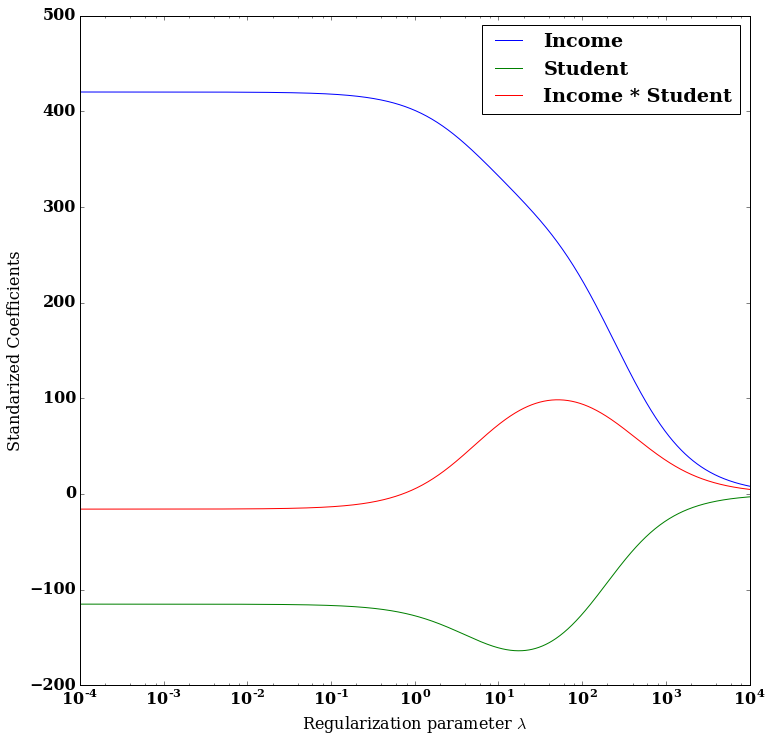

In [600]:
train_r_squared, test_r_squared, coeff_a, lambdas= MyRidgeLassoReg(x_train, x_test, 'Ridge')
plt.figure(figsize=(12,12))
h=plt.semilogx(10**lambdas, coeff_a);
plt.ylabel("Standarized Coefficients")
plt.xlabel(r'Regularization parameter $\lambda$')
plt.legend(h, ['Income', 'Student', 'Income * Student'])
plt.show()

Regression: max R^2 score on training set 0.833622777083
Regression: max R^2 score on test set 0.787283936832
[ 492.4046127   -68.72178443 -100.25920634]
Selected predictors: [1, 2, 3]


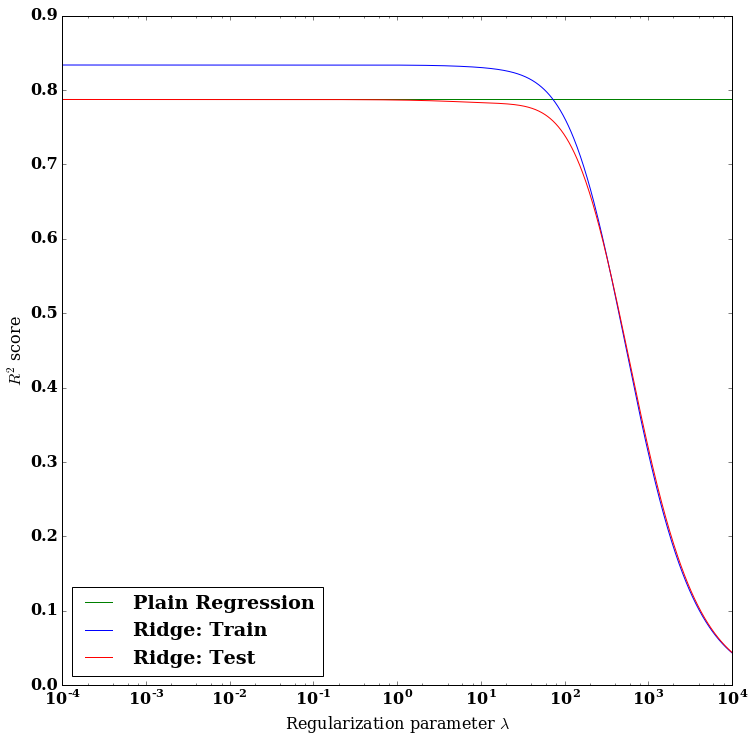

In [601]:
PlotR2(lambdas,test_r_squared_plain, train_r_squared, test_r_squared )

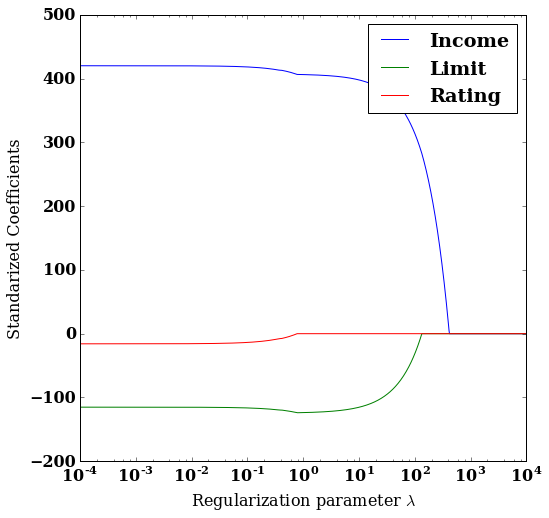

Regression: max R^2 score on training set 0.833622777083
Regression: max R^2 score on test set 0.788725679562
[ 406.10298907 -123.55308507   -0.        ]
Selected predictors: [1, 2]


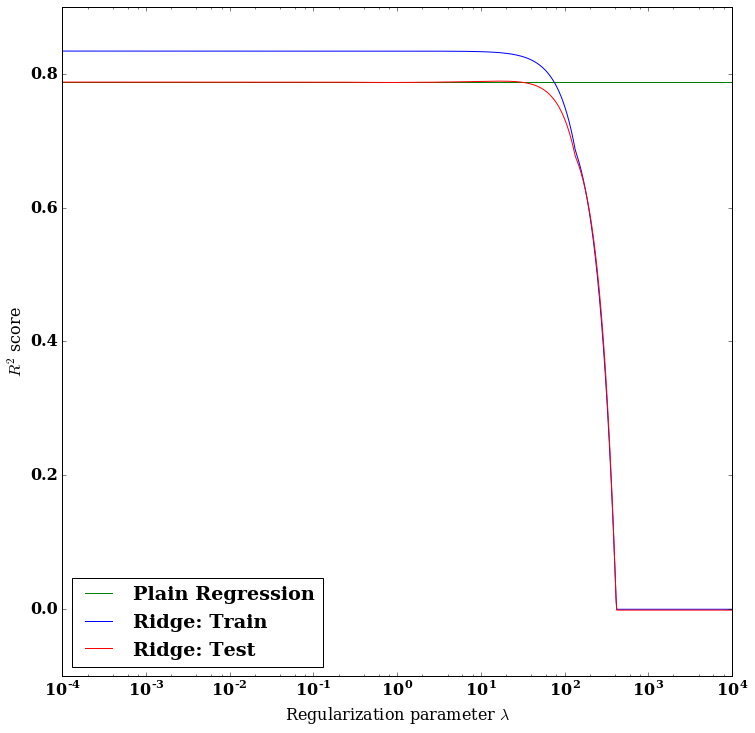

In [602]:
train_r_squared, test_r_squared, coeff_a, lambdas= MyRidgeLassoReg(x_train, x_test, 'Lasso')
PlotCoeff(lambdas, coeff_a)
PlotR2(lambdas,test_r_squared_plain, train_r_squared, test_r_squared )

## Lasso and Ridge - different formalism

The minimization of the lost functions including the l2 and 11 terms can be expressed as a minimization with a constraint. 

$ {\min}_{\beta}(RSS)$ subject to $ \sum_{j=1}^p | \beta_j| < s $

$ {\min}_{\beta}(RSS)$ subject to $ \sum_{j=1}^p  \beta_j^2 < s $

It means that for a given value of $\lambda$ there is an $s$ such that the equations above give the same results as the loss functions we saw before for ridge and lasso. 

In the case of $p=2$ this can be visualized as

<img src="LassoRidge.png" alt="" style="width:804px;">

--- 
# Roadmap 

- More in interaction terms
- Dimensionality Reduction Methods
- Where Linear Regression Fails 
- Probabilistic view of linear regression 
- ** --- *** 
- Midterm 
- ---
- Classification 
    - Logistic Regression 
    - Trees and forests
    - Support Vector Machines 
- ---

- Other topics 